In [2]:
import requests
import mysql.connector as conn
from config import aws_db_config

In [2]:
def get_matches(params):
    response = requests.get("https://www.vivino.com/api/explore/explore", params=params,
        headers= {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0"
        })
        
    
    print(response)
    
    json = response.json()
    
    matches = json["explore_vintage"]["matches"]
    numMatches = json["explore_vintage"]["records_matched"]
    
    return matches, numMatches

In [3]:
def match_to_db(cnx, cursor, match):
    """
    Assumes that the Database "WineData" and table "WineData" already exist with 
    columns (Id, Name, Price, Rating, NumRatings, Type, Year, )
    """
    wine = match["vintage"]["wine"]
    
    Id = int(match["vintage"]["id"]) #Wine id
    Name = match["vintage"]["name"] #Wine name
    Price = float(match["price"]["amount"]) #Price of bottle
    Rating = float(wine['statistics']["ratings_average"]) #Wine rating
    NumRatings = int(wine['statistics']['ratings_count']) #Number of ratings
    Type = int(wine["type_id"]) #Type of wine (Red, White, Rose)
    try:
        StyleName = wine["style"]["name"]
    except:
        StyleName = "NONE"
    Year = match["vintage"]["year"] #Wine year
    if Year == "N.V.":
        Year = 0
    elif Year == "":
        Year = -1
    else:
        Year = int(Year)
    try:
        Body = wine['style']['body'] #Body
    except:
        Body = -1
    try:
        Acidity = wine['style']['acidity']
    except:
        Acidity = -1
    Vintage = int(wine["vintage_type"])
    Natural = int(wine["is_natural"])
    try:
        Region = wine['region']["name"] #Wine region
        Country = wine['region']["country"]["name"] #Wine country
    except:
        Region = "NONE"
        Country = "NONE"
    Size = int(match["price"]["bottle_type"]['volume_ml']) #size of bottle
    Winery = wine["winery"]["name"] #Winery
    
    query = (
        f'INSERT INTO WineData (Id,Name,Price,Rating,NumRatings,Type,StyleName,Year,Body,Acidity,Vintage,Nat,Region,Country,Size,Winery)'
        f'VALUES ({Id},"{Name}",{Price},{Rating},{NumRatings},{Type},"{StyleName}",{Year},{Body},{Acidity},{Vintage},{Natural},"{Region}","{Country}",{Size},"{Winery}")'
    )
    try:
        cursor.execute(query)
        cnx.commit()
    except:
        print(f'VALUES ({Id},"{Name}",{Price},{Rating},{NumRatings},{Type},"{StyleName}",{Year},{Body},{Acidity},{Vintage},{Natural},"{Region}","{Country}",{Size},"{Winery}")')

In [29]:
#Database connection
cnx = conn.connect(**aws_db_config)
cursor = cnx.cursor(buffered=True)

In [5]:
params = {
        "currency_code":"USD",
        "min_rating":"1",
        "order_by":"price",
        "order":"asc",
        "page": 1,
        "price_range_max":"500",
        "price_range_min":"0",
        "wine_type_ids[]":"1"
}

for wine_id in [1,2,4,3]:
    params["wine_type_ids[]"] = str(wine_id)
    params["page"] = 1
    matches, numMatches = get_matches(params)
    
    for i in range(numMatches//25):
        for match in matches:
            match_to_db(cnx, cursor, match)
        print(f'Added page {params["page"]} to database for wine type {wine_id}')
        params["page"] += 1
        matches, numMatches = get_matches(params)
    

<Response [200]>
Added page 1 to database for wine type 1
<Response [200]>
Added page 2 to database for wine type 1
<Response [200]>
Added page 3 to database for wine type 1
<Response [200]>
Added page 4 to database for wine type 1
<Response [200]>
Added page 5 to database for wine type 1
<Response [200]>
Added page 6 to database for wine type 1
<Response [200]>
Added page 7 to database for wine type 1
<Response [200]>
Added page 8 to database for wine type 1
<Response [200]>
Added page 9 to database for wine type 1
<Response [200]>
Added page 10 to database for wine type 1
<Response [200]>
Added page 11 to database for wine type 1
<Response [200]>
Added page 12 to database for wine type 1
<Response [200]>
Added page 13 to database for wine type 1
<Response [200]>
Added page 14 to database for wine type 1
<Response [200]>
Added page 15 to database for wine type 1
<Response [200]>
Added page 16 to database for wine type 1
<Response [200]>
Added page 17 to database for wine type 1
<Respo

<Response [200]>
Added page 140 to database for wine type 1
<Response [200]>
Added page 141 to database for wine type 1
<Response [200]>
Added page 142 to database for wine type 1
<Response [200]>
Added page 143 to database for wine type 1
<Response [200]>
Added page 144 to database for wine type 1
<Response [200]>
Added page 145 to database for wine type 1
<Response [200]>
Added page 146 to database for wine type 1
<Response [200]>
Added page 147 to database for wine type 1
<Response [200]>
Added page 148 to database for wine type 1
<Response [200]>
Added page 149 to database for wine type 1
<Response [200]>
Added page 150 to database for wine type 1
<Response [200]>
Added page 151 to database for wine type 1
<Response [200]>
Added page 152 to database for wine type 1
<Response [200]>
Added page 153 to database for wine type 1
<Response [200]>
Added page 154 to database for wine type 1
<Response [200]>
Added page 155 to database for wine type 1
<Response [200]>
Added page 156 to datab

<Response [200]>
Added page 277 to database for wine type 1
<Response [200]>
Added page 278 to database for wine type 1
<Response [200]>
Added page 279 to database for wine type 1
<Response [200]>
Added page 280 to database for wine type 1
<Response [200]>
Added page 281 to database for wine type 1
<Response [200]>
Added page 282 to database for wine type 1
<Response [200]>
Added page 283 to database for wine type 1
<Response [200]>
Added page 284 to database for wine type 1
<Response [200]>
Added page 285 to database for wine type 1
<Response [200]>
Added page 286 to database for wine type 1
<Response [200]>
Added page 287 to database for wine type 1
<Response [200]>
Added page 288 to database for wine type 1
<Response [200]>
Added page 289 to database for wine type 1
<Response [200]>
Added page 290 to database for wine type 1
<Response [200]>
Added page 291 to database for wine type 1
<Response [200]>
Added page 292 to database for wine type 1
<Response [200]>
Added page 293 to datab

<Response [200]>
Added page 414 to database for wine type 1
<Response [200]>
Added page 415 to database for wine type 1
<Response [200]>
Added page 416 to database for wine type 1
<Response [200]>
Added page 417 to database for wine type 1
<Response [200]>
Added page 418 to database for wine type 1
<Response [200]>
Added page 419 to database for wine type 1
<Response [200]>
Added page 420 to database for wine type 1
<Response [200]>
Added page 421 to database for wine type 1
<Response [200]>
Added page 422 to database for wine type 1
<Response [200]>
Added page 423 to database for wine type 1
<Response [200]>
Added page 424 to database for wine type 1
<Response [200]>
Added page 425 to database for wine type 1
<Response [200]>
Added page 426 to database for wine type 1
<Response [200]>
Added page 427 to database for wine type 1
<Response [200]>
Added page 428 to database for wine type 1
<Response [200]>
Added page 429 to database for wine type 1
<Response [200]>
Added page 430 to datab

<Response [200]>
Added page 551 to database for wine type 1
<Response [200]>
Added page 552 to database for wine type 1
<Response [200]>
Added page 553 to database for wine type 1
<Response [200]>
Added page 554 to database for wine type 1
<Response [200]>
Added page 555 to database for wine type 1
<Response [200]>
Added page 556 to database for wine type 1
<Response [200]>
Added page 557 to database for wine type 1
<Response [200]>
Added page 558 to database for wine type 1
<Response [200]>
Added page 559 to database for wine type 1
<Response [200]>
Added page 560 to database for wine type 1
<Response [200]>
Added page 561 to database for wine type 1
<Response [200]>
Added page 562 to database for wine type 1
<Response [200]>
Added page 563 to database for wine type 1
<Response [200]>
Added page 564 to database for wine type 1
<Response [200]>
Added page 565 to database for wine type 1
<Response [200]>
Added page 566 to database for wine type 1
<Response [200]>
Added page 567 to datab

<Response [200]>
Added page 688 to database for wine type 1
<Response [200]>
Added page 689 to database for wine type 1
<Response [200]>
Added page 690 to database for wine type 1
<Response [200]>
Added page 691 to database for wine type 1
<Response [200]>
Added page 692 to database for wine type 1
<Response [200]>
Added page 693 to database for wine type 1
<Response [200]>
Added page 694 to database for wine type 1
<Response [200]>
Added page 695 to database for wine type 1
<Response [200]>
Added page 696 to database for wine type 1
<Response [200]>
Added page 697 to database for wine type 1
<Response [200]>
Added page 698 to database for wine type 1
<Response [200]>
Added page 699 to database for wine type 1
<Response [200]>
Added page 700 to database for wine type 1
<Response [200]>
Added page 701 to database for wine type 1
<Response [200]>
Added page 702 to database for wine type 1
<Response [200]>
Added page 703 to database for wine type 1
<Response [200]>
Added page 704 to datab

<Response [200]>
Added page 825 to database for wine type 1
<Response [200]>
Added page 826 to database for wine type 1
<Response [200]>
Added page 827 to database for wine type 1
<Response [200]>
Added page 828 to database for wine type 1
<Response [200]>
Added page 829 to database for wine type 1
<Response [200]>
Added page 830 to database for wine type 1
<Response [200]>
Added page 831 to database for wine type 1
<Response [200]>
Added page 832 to database for wine type 1
<Response [200]>
Added page 833 to database for wine type 1
<Response [200]>
Added page 834 to database for wine type 1
<Response [200]>
Added page 835 to database for wine type 1
<Response [200]>
Added page 836 to database for wine type 1
<Response [200]>
Added page 837 to database for wine type 1
<Response [200]>
Added page 838 to database for wine type 1
<Response [200]>
Added page 839 to database for wine type 1
<Response [200]>
Added page 840 to database for wine type 1
<Response [200]>
Added page 841 to datab

<Response [200]>
Added page 962 to database for wine type 1
<Response [200]>
Added page 963 to database for wine type 1
<Response [200]>
Added page 964 to database for wine type 1
<Response [200]>
Added page 965 to database for wine type 1
<Response [200]>
Added page 966 to database for wine type 1
<Response [200]>
Added page 967 to database for wine type 1
<Response [200]>
Added page 968 to database for wine type 1
<Response [200]>
Added page 969 to database for wine type 1
<Response [200]>
Added page 970 to database for wine type 1
<Response [200]>
Added page 971 to database for wine type 1
<Response [200]>
Added page 972 to database for wine type 1
<Response [200]>
Added page 973 to database for wine type 1
<Response [200]>
Added page 974 to database for wine type 1
<Response [200]>
Added page 975 to database for wine type 1
<Response [200]>
Added page 976 to database for wine type 1
<Response [200]>
Added page 977 to database for wine type 1
<Response [200]>
Added page 978 to datab

<Response [200]>
Added page 1097 to database for wine type 1
<Response [200]>
Added page 1098 to database for wine type 1
<Response [200]>
Added page 1099 to database for wine type 1
<Response [200]>
Added page 1100 to database for wine type 1
<Response [200]>
Added page 1101 to database for wine type 1
<Response [200]>
Added page 1102 to database for wine type 1
<Response [200]>
Added page 1103 to database for wine type 1
<Response [200]>
Added page 1104 to database for wine type 1
<Response [200]>
Added page 1105 to database for wine type 1
<Response [200]>
Added page 1106 to database for wine type 1
<Response [200]>
Added page 1107 to database for wine type 1
<Response [200]>
Added page 1108 to database for wine type 1
<Response [200]>
Added page 1109 to database for wine type 1
<Response [200]>
Added page 1110 to database for wine type 1
<Response [200]>
Added page 1111 to database for wine type 1
<Response [200]>
Added page 1112 to database for wine type 1
<Response [200]>
Added p

<Response [200]>
Added page 1232 to database for wine type 1
<Response [200]>
Added page 1233 to database for wine type 1
<Response [200]>
Added page 1234 to database for wine type 1
<Response [200]>
Added page 1235 to database for wine type 1
<Response [200]>
Added page 1236 to database for wine type 1
<Response [200]>
Added page 1237 to database for wine type 1
<Response [200]>
Added page 1238 to database for wine type 1
<Response [200]>
Added page 1239 to database for wine type 1
<Response [200]>
Added page 1240 to database for wine type 1
<Response [200]>
Added page 1241 to database for wine type 1
<Response [200]>
Added page 1242 to database for wine type 1
<Response [200]>
Added page 1243 to database for wine type 1
<Response [200]>
Added page 1244 to database for wine type 1
<Response [200]>
Added page 1245 to database for wine type 1
<Response [200]>
Added page 1246 to database for wine type 1
<Response [200]>
Added page 1247 to database for wine type 1
<Response [200]>
Added p

<Response [200]>
Added page 1367 to database for wine type 1
<Response [200]>
Added page 1368 to database for wine type 1
<Response [200]>
Added page 1369 to database for wine type 1
<Response [200]>
Added page 1370 to database for wine type 1
<Response [200]>
Added page 1371 to database for wine type 1
<Response [200]>
Added page 1372 to database for wine type 1
<Response [200]>
Added page 1373 to database for wine type 1
<Response [200]>
Added page 1374 to database for wine type 1
<Response [200]>
Added page 1375 to database for wine type 1
<Response [200]>
Added page 1376 to database for wine type 1
<Response [200]>
Added page 1377 to database for wine type 1
<Response [200]>
Added page 1378 to database for wine type 1
<Response [200]>
Added page 1379 to database for wine type 1
<Response [200]>
Added page 1380 to database for wine type 1
<Response [200]>
Added page 1381 to database for wine type 1
<Response [200]>
Added page 1382 to database for wine type 1
<Response [200]>
Added p

<Response [200]>
Added page 1502 to database for wine type 1
<Response [200]>
Added page 1503 to database for wine type 1
<Response [200]>
Added page 1504 to database for wine type 1
<Response [200]>
Added page 1505 to database for wine type 1
<Response [200]>
Added page 1506 to database for wine type 1
<Response [200]>
Added page 1507 to database for wine type 1
<Response [200]>
Added page 1508 to database for wine type 1
<Response [200]>
Added page 1509 to database for wine type 1
<Response [200]>
Added page 1510 to database for wine type 1
<Response [200]>
Added page 1511 to database for wine type 1
<Response [200]>
Added page 1512 to database for wine type 1
<Response [200]>
Added page 1513 to database for wine type 1
<Response [200]>
Added page 1514 to database for wine type 1
<Response [200]>
Added page 1515 to database for wine type 1
<Response [200]>
Added page 1516 to database for wine type 1
<Response [200]>
Added page 1517 to database for wine type 1
<Response [200]>
Added p

<Response [200]>
Added page 1637 to database for wine type 1
<Response [200]>
Added page 1638 to database for wine type 1
<Response [200]>
Added page 1639 to database for wine type 1
<Response [200]>
Added page 1640 to database for wine type 1
<Response [200]>
Added page 1641 to database for wine type 1
<Response [200]>
Added page 1642 to database for wine type 1
<Response [200]>
Added page 1643 to database for wine type 1
<Response [200]>
Added page 1644 to database for wine type 1
<Response [200]>
Added page 1645 to database for wine type 1
<Response [200]>
Added page 1646 to database for wine type 1
<Response [200]>
Added page 1647 to database for wine type 1
<Response [200]>
Added page 1648 to database for wine type 1
<Response [200]>
Added page 1649 to database for wine type 1
<Response [200]>
Added page 1650 to database for wine type 1
<Response [200]>
Added page 1651 to database for wine type 1
<Response [200]>
Added page 1652 to database for wine type 1
<Response [200]>
Added p

<Response [200]>
Added page 1772 to database for wine type 1
<Response [200]>
Added page 1773 to database for wine type 1
<Response [200]>
Added page 1774 to database for wine type 1
<Response [200]>
Added page 1775 to database for wine type 1
<Response [200]>
Added page 1776 to database for wine type 1
<Response [200]>
Added page 1777 to database for wine type 1
<Response [200]>
Added page 1778 to database for wine type 1
<Response [200]>
Added page 1779 to database for wine type 1
<Response [200]>
Added page 1780 to database for wine type 1
<Response [200]>
Added page 1781 to database for wine type 1
<Response [200]>
Added page 1782 to database for wine type 1
<Response [200]>
Added page 1783 to database for wine type 1
<Response [200]>
Added page 1784 to database for wine type 1
<Response [200]>
Added page 1785 to database for wine type 1
<Response [200]>
Added page 1786 to database for wine type 1
<Response [200]>
Added page 1787 to database for wine type 1
<Response [200]>
Added p

<Response [200]>
Added page 1907 to database for wine type 1
<Response [200]>
Added page 1908 to database for wine type 1
<Response [200]>
Added page 1909 to database for wine type 1
<Response [200]>
Added page 1910 to database for wine type 1
<Response [200]>
Added page 1911 to database for wine type 1
<Response [200]>
Added page 1912 to database for wine type 1
<Response [200]>
Added page 1913 to database for wine type 1
<Response [200]>
Added page 1914 to database for wine type 1
<Response [200]>
Added page 1915 to database for wine type 1
<Response [200]>
Added page 1916 to database for wine type 1
<Response [200]>
Added page 1917 to database for wine type 1
<Response [200]>
Added page 1918 to database for wine type 1
<Response [200]>
Added page 1919 to database for wine type 1
<Response [200]>
Added page 1920 to database for wine type 1
<Response [200]>
Added page 1921 to database for wine type 1
<Response [200]>
Added page 1922 to database for wine type 1
<Response [200]>
Added p

<Response [200]>
Added page 69 to database for wine type 2
<Response [200]>
Added page 70 to database for wine type 2
<Response [200]>
Added page 71 to database for wine type 2
<Response [200]>
Added page 72 to database for wine type 2
<Response [200]>
Added page 73 to database for wine type 2
<Response [200]>
Added page 74 to database for wine type 2
<Response [200]>
Added page 75 to database for wine type 2
<Response [200]>
Added page 76 to database for wine type 2
<Response [200]>
Added page 77 to database for wine type 2
<Response [200]>
Added page 78 to database for wine type 2
<Response [200]>
Added page 79 to database for wine type 2
<Response [200]>
Added page 80 to database for wine type 2
<Response [200]>
Added page 81 to database for wine type 2
<Response [200]>
Added page 82 to database for wine type 2
<Response [200]>
Added page 83 to database for wine type 2
<Response [200]>
Added page 84 to database for wine type 2
<Response [200]>
Added page 85 to database for wine type

Added page 206 to database for wine type 2
<Response [200]>
Added page 207 to database for wine type 2
<Response [200]>
Added page 208 to database for wine type 2
<Response [200]>
Added page 209 to database for wine type 2
<Response [200]>
Added page 210 to database for wine type 2
<Response [200]>
Added page 211 to database for wine type 2
<Response [200]>
Added page 212 to database for wine type 2
<Response [200]>
Added page 213 to database for wine type 2
<Response [200]>
Added page 214 to database for wine type 2
<Response [200]>
Added page 215 to database for wine type 2
<Response [200]>
Added page 216 to database for wine type 2
<Response [200]>
Added page 217 to database for wine type 2
<Response [200]>
Added page 218 to database for wine type 2
<Response [200]>
Added page 219 to database for wine type 2
<Response [200]>
Added page 220 to database for wine type 2
<Response [200]>
Added page 221 to database for wine type 2
<Response [200]>
Added page 222 to database for wine type

<Response [200]>
Added page 343 to database for wine type 2
<Response [200]>
Added page 344 to database for wine type 2
<Response [200]>
Added page 345 to database for wine type 2
<Response [200]>
Added page 346 to database for wine type 2
<Response [200]>
Added page 347 to database for wine type 2
<Response [200]>
Added page 348 to database for wine type 2
<Response [200]>
Added page 349 to database for wine type 2
<Response [200]>
Added page 350 to database for wine type 2
<Response [200]>
Added page 351 to database for wine type 2
<Response [200]>
Added page 352 to database for wine type 2
<Response [200]>
Added page 353 to database for wine type 2
<Response [200]>
Added page 354 to database for wine type 2
<Response [200]>
Added page 355 to database for wine type 2
<Response [200]>
Added page 356 to database for wine type 2
<Response [200]>
Added page 357 to database for wine type 2
<Response [200]>
Added page 358 to database for wine type 2
<Response [200]>
Added page 359 to datab

<Response [200]>
Added page 480 to database for wine type 2
<Response [200]>
Added page 481 to database for wine type 2
<Response [200]>
Added page 482 to database for wine type 2
<Response [200]>
Added page 483 to database for wine type 2
<Response [200]>
Added page 484 to database for wine type 2
<Response [200]>
Added page 485 to database for wine type 2
<Response [200]>
Added page 486 to database for wine type 2
<Response [200]>
Added page 487 to database for wine type 2
<Response [200]>
Added page 488 to database for wine type 2
<Response [200]>
Added page 489 to database for wine type 2
<Response [200]>
Added page 490 to database for wine type 2
<Response [200]>
Added page 491 to database for wine type 2
<Response [200]>
Added page 492 to database for wine type 2
<Response [200]>
Added page 493 to database for wine type 2
<Response [200]>
Added page 494 to database for wine type 2
<Response [200]>
Added page 495 to database for wine type 2
<Response [200]>
Added page 496 to datab

<Response [200]>
Added page 617 to database for wine type 2
<Response [200]>
Added page 618 to database for wine type 2
<Response [200]>
Added page 619 to database for wine type 2
<Response [200]>
Added page 620 to database for wine type 2
<Response [200]>
Added page 621 to database for wine type 2
<Response [200]>
Added page 622 to database for wine type 2
<Response [200]>
Added page 623 to database for wine type 2
<Response [200]>
Added page 624 to database for wine type 2
<Response [200]>
Added page 625 to database for wine type 2
<Response [200]>
Added page 626 to database for wine type 2
<Response [200]>
Added page 627 to database for wine type 2
<Response [200]>
Added page 628 to database for wine type 2
<Response [200]>
Added page 629 to database for wine type 2
<Response [200]>
Added page 630 to database for wine type 2
<Response [200]>
Added page 631 to database for wine type 2
<Response [200]>
Added page 632 to database for wine type 2
<Response [200]>
Added page 633 to datab

Added page 39 to database for wine type 4
<Response [200]>
Added page 40 to database for wine type 4
<Response [200]>
Added page 41 to database for wine type 4
<Response [200]>
Added page 42 to database for wine type 4
<Response [200]>
Added page 43 to database for wine type 4
<Response [200]>
Added page 44 to database for wine type 4
<Response [200]>
Added page 45 to database for wine type 4
<Response [200]>
Added page 46 to database for wine type 4
<Response [200]>
Added page 47 to database for wine type 4
<Response [200]>
Added page 48 to database for wine type 4
<Response [200]>
Added page 49 to database for wine type 4
<Response [200]>
Added page 50 to database for wine type 4
<Response [200]>
Added page 51 to database for wine type 4
<Response [200]>
Added page 52 to database for wine type 4
<Response [200]>
Added page 53 to database for wine type 4
<Response [200]>
Added page 54 to database for wine type 4
<Response [200]>
Added page 55 to database for wine type 4
<Response [200

<Response [200]>
Added page 116 to database for wine type 3
<Response [200]>
Added page 117 to database for wine type 3
<Response [200]>
Added page 118 to database for wine type 3
<Response [200]>
Added page 119 to database for wine type 3
<Response [200]>
Added page 120 to database for wine type 3
<Response [200]>
Added page 121 to database for wine type 3
<Response [200]>
Added page 122 to database for wine type 3
<Response [200]>
Added page 123 to database for wine type 3
<Response [200]>
Added page 124 to database for wine type 3
<Response [200]>
Added page 125 to database for wine type 3
<Response [200]>
Added page 126 to database for wine type 3
<Response [200]>
Added page 127 to database for wine type 3
<Response [200]>
Added page 128 to database for wine type 3
<Response [200]>
Added page 129 to database for wine type 3
<Response [200]>
Added page 130 to database for wine type 3
<Response [200]>
Added page 131 to database for wine type 3
<Response [200]>
Added page 132 to datab

In [ ]:
#Save to csv
df.csv("WineData.csv")

# Exploratory Data Analysis

In [3]:
import pandas as pd

cnx = conn.connect(**aws_db_config)
cursor = cnx.cursor(buffered=True)
SQL_Query = pd.read_sql_query(
        '''select Distinct * FROM WineData ORDER BY Id''', cnx)
df = pd.DataFrame(SQL_Query)
df

,Id,Name,Price,Rating,NumRatings,Type,StyleName,Year,Body,Acidity,Vintage,Nat,Region,Country,Size,Winery
0,12424,Pol Roger Brut Vintage Champagne (Extra Cuvée ...,59.99,4.3,20330,3,French Champagne,2006,3,3,0,0,Champagne,France,750,Pol Roger
1,18110,Vilmart & Cie Cuvée Creation Champagne 1998,170.00,4.5,118,3,French Champagne,1998,3,3,0,0,Champagne,France,1500,Vilmart & Cie
2,19671,R&L Legras Cuvée St-Vincent Blanc de Blancs Br...,199.99,4.3,252,3,French Champagne,1996,3,3,0,0,Champagne Grand Cru 'Chouilly',France,750,R&L Legras
3,82144,Louis Roederer Cristal Rosé Brut Champagne (Mi...,509.99,4.6,5471,3,French Champagne,2002,3,3,0,0,Champagne,France,750,Louis Roederer
4,83452,Louis Roederer Cristal Rosé Brut Champagne (Mi...,950.00,4.6,5471,3,French Champagne,1999,3,3,0,0,Champagne,France,750,Louis Roederer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8337,170082349,Damiani Wine Cellars Bollicine N.V.,16.00,3.9,48,3,NONE,0,-1,-1,1,0,Finger Lakes,United States,750,Damiani Wine Cellars
8338,170098712,Jaume Serra Bouquet Cava Rosé N.V.,15.99,3.3,89,3,Spanish Cava,0,2,3,1,0,Cava,Spain,750,Jaume Serra
8339,170262152,Angels & Cowboys Rosé 2021,14.99,3.9,2381,4,Californian Rosé,2021,3,2,0,0,Sonoma County,United States,750,Angels & Cowboys
8340,170372901,19 Crimes Martha's Chard 2020,11.76,3.7,279,2,Californian Chardonnay,2020,4,3,0,0,California,United States,750,19 Crimes


In [10]:
#Num records with body
len(df.loc[df["Body"] != -1])

5891

In [11]:
#Num records with acidity
len(df.loc[df["Acidity"] != -1])

5891

In [12]:
#Num records with vintage
len(df.loc[df["Vintage"] != -1])

8342

In [13]:
#Num records with Natural
len(df.loc[df["Nat"] != -1])

8342

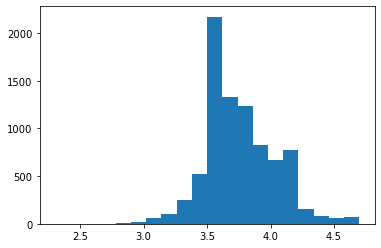

In [17]:
import matplotlib.pyplot as plt

plt.hist(df["Rating"],bins=20)
plt.show()

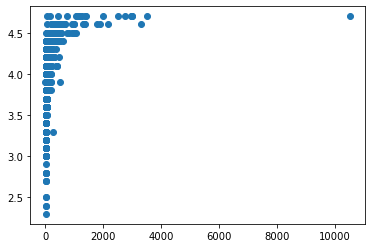

In [18]:
#Rating vs Price
plt.scatter(df['Price'],df["Rating"])
plt.show()

In [16]:
#Outlier
df.loc[df["Price"] > 10000]

,Id,Name,Price,Rating,NumRatings,Type,StyleName,Year,Body,Acidity,Vintage,Nat,Region,Country,Size,Winery
27,1190668,Salon Le Mesnil Blanc de Blancs (Cuvée S) Brut...,10500.0,4.7,8714,3,French Champagne,2008,3,3,0,0,Champagne Grand Cru 'Le Mesnil-sur-Oger',France,1500,Salon


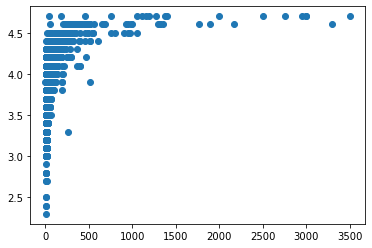

In [20]:
#Plot without outlier
filtered = df.loc[~(df["Price"] > 10000)]

plt.scatter(filtered['Price'],filtered["Rating"])
plt.show()

<ipython-input-24-ca6464fa77e0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log["log_price"] = np.log(df["Price"])


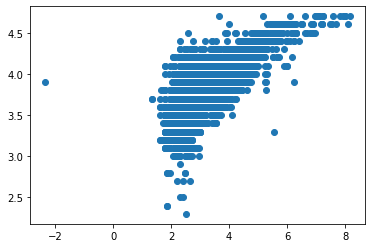

In [24]:
import numpy as np

#Plot log price
log = filtered
log["log_price"] = np.log(df["Price"])

plt.scatter(log['log_price'],log["Rating"])
plt.show()

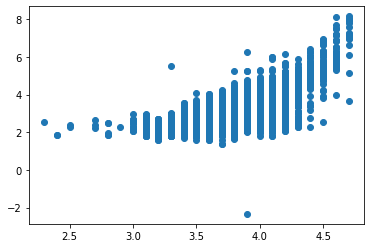

In [26]:
plt.scatter(log["Rating"],log['log_price'])
plt.show()

# Linear Regression to predict price on value columns

In [35]:
import statsmodels.api as sm

In [51]:
X = filtered.drop(columns=["Price","Id","Name",'StyleName',"Region","Country", "Winery"]).values
y = filtered["Price"].values.reshape(-1,1)

X.shape,y.shape

((8341, 11), (8341, 1))

In [52]:
model = sm.OLS(X,y)
res = model.fit()
res.summary()

ValueError: shapes (8341,11) and (8341,11) not aligned: 11 (dim 1) != 8341 (dim 0)